In [10]:
!pip install tensorflow keras numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


Import the laibrary


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

Load EMNIST letter data

In [12]:
file_path = "/Users/mac2/University/Deep Learning/ANN/ANN-EMNIST/ann_charachter/emnist-letters-train.csv"
df = pd.read_csv(file_path)


Show the data

In [13]:
df.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separate labels and pixel values

In [14]:
X = df.iloc[:, 1:].values  # Pixel data
y = df.iloc[:, 0].values   # Labels


Shape Images

In [15]:
X.shape

(88799, 784)

Shape Labels

In [16]:
y.shape

(88799,)

Normalize pixle values to the range [0, 1]

In [17]:
X = X / 255.0


Show after Normalization

In [18]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01176471,
       0.03137255, 0.1254902 , 0.14509804, 0.14509804, 0.14509

Reshape images to (28, 28) 

In [19]:
X = X.reshape(-1, 28, 28, 1)


Convert Labels to One-Hot Encoding (Fix 0-25 Range)
Make labels range from 0 to 25

In [20]:
# Convert Labels to One-Hot Encoding (Fix 0-25 Range)
y = y - 1  # Make labels range from 0 to 25
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)


Convert labels to categorical format (one-hot encoding)

Split the images with labels(one-hot encoding)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X = np.transpose(X, (0, 2, 1, 3))  
X = np.flip(X, axis=2)  


Visualize some Images

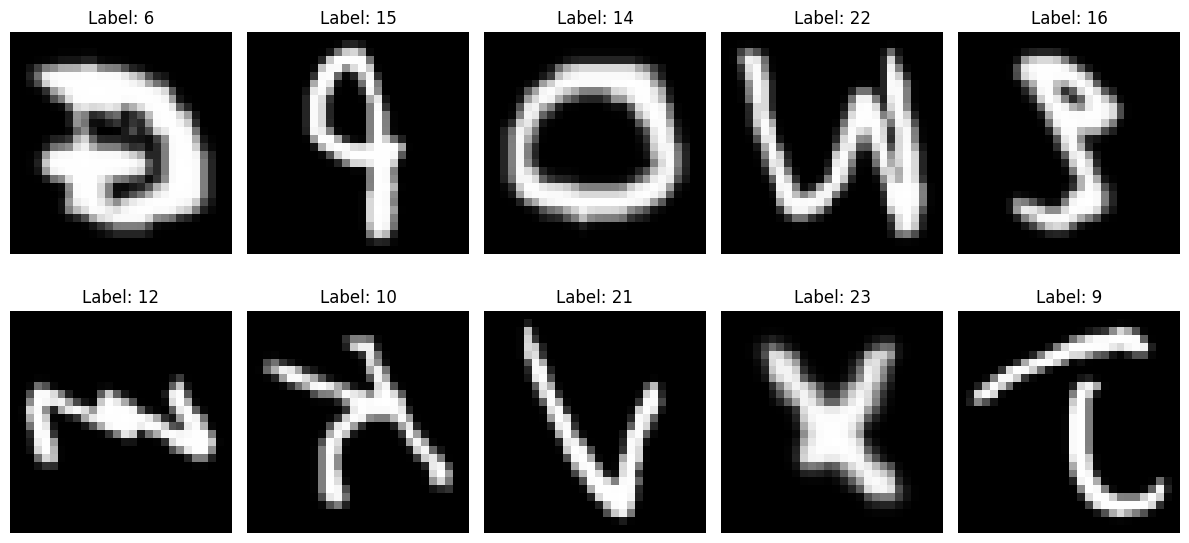

In [23]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Build a simple ANN model

In [24]:
def build_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [25]:
model = build_model()

/Users/mac2/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-Validation

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,426 (431.35 KB)

 Trainable params: 110,426 (431.35 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
histories = []

Train the model 


In [19]:
for train_index, val_index in kf.split(X_train):
    print(f"Training Fold {fold}...")
    model = build_model()
    
    X_t, X_v = X_train[train_index], X_train[val_index]
    y_t, y_v = y_train[train_index], y_train[val_index]

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

    history = model.fit(X_t, y_t, epochs=20, batch_size=32, validation_data=(X_v, y_v),
                        callbacks=[early_stopping, lr_scheduler])
    histories.append(history)
    fold += 1

Training Fold 1...


/Users/mac2/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6175 - loss: 1.3266 - val_accuracy: 0.8144 - val_loss: 0.6112 - learning_rate: 0.0010
Epoch 2/20
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8446 - loss: 0.5065 - val_accuracy: 0.8542 - val_loss: 0.4745 - learning_rate: 0.0010
Epoch 3/20
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.3933 - val_accuracy: 0.8638 - val_loss: 0.4359 - learning_rate: 0.0010
Epoch 4/20
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8923 - loss: 0.3404 - val_accuracy: 0.8685 - val_loss: 0.4272 - learning_rate: 0.0010
Epoch 5/20
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9017 - loss: 0.3005 - val_accuracy: 0.8762 - val_loss: 0.3976 - learning_rate: 0.0010
Epoch 6/20
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9100 - loss: 0.2752 - val_accuracy: 0.8820 - val_loss: 0.3860 - learning_rate: 0.0010
Epoch 7/20
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9149 - l

Evaluation on Test Set

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8902 - loss: 0.3734
Test Accuracy: 0.8866553902626038


Visualization of Training Performance & Validation Accuracy

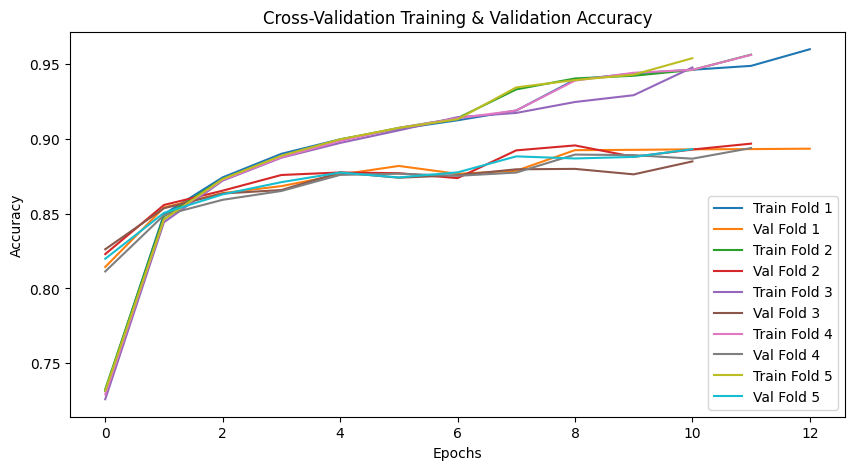

In [28]:
plt.figure(figsize=(10, 5))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'Val Fold {i+1}')

plt.title('Cross-Validation Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion Matrix

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


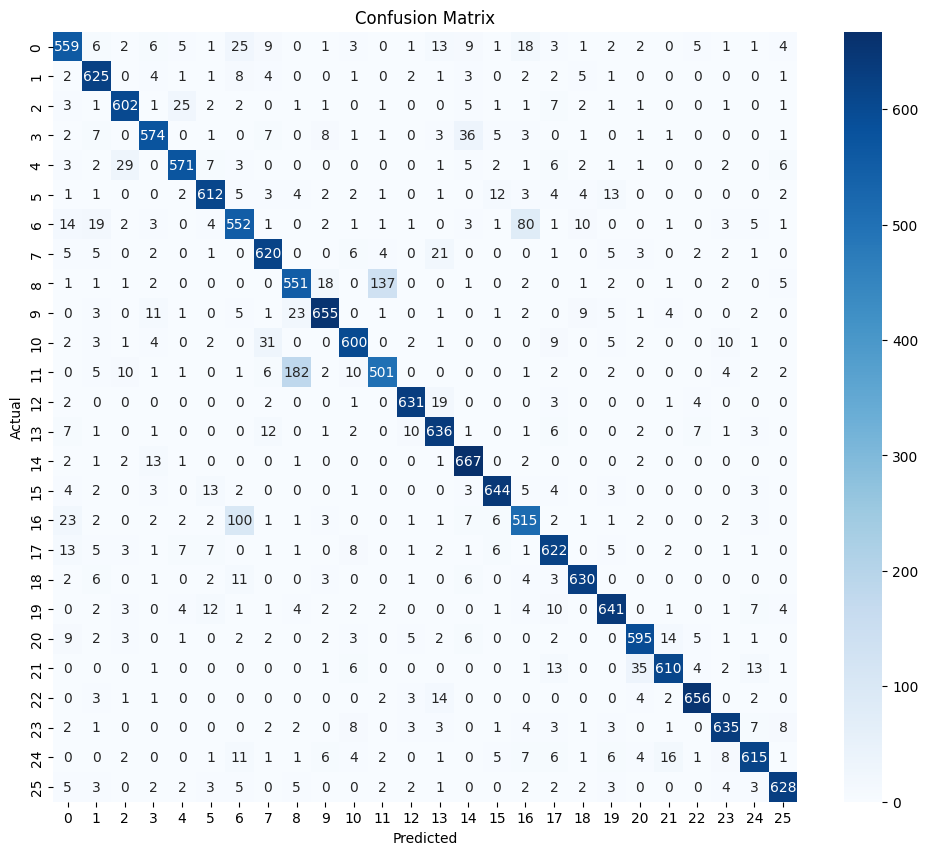

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Misclassified images 

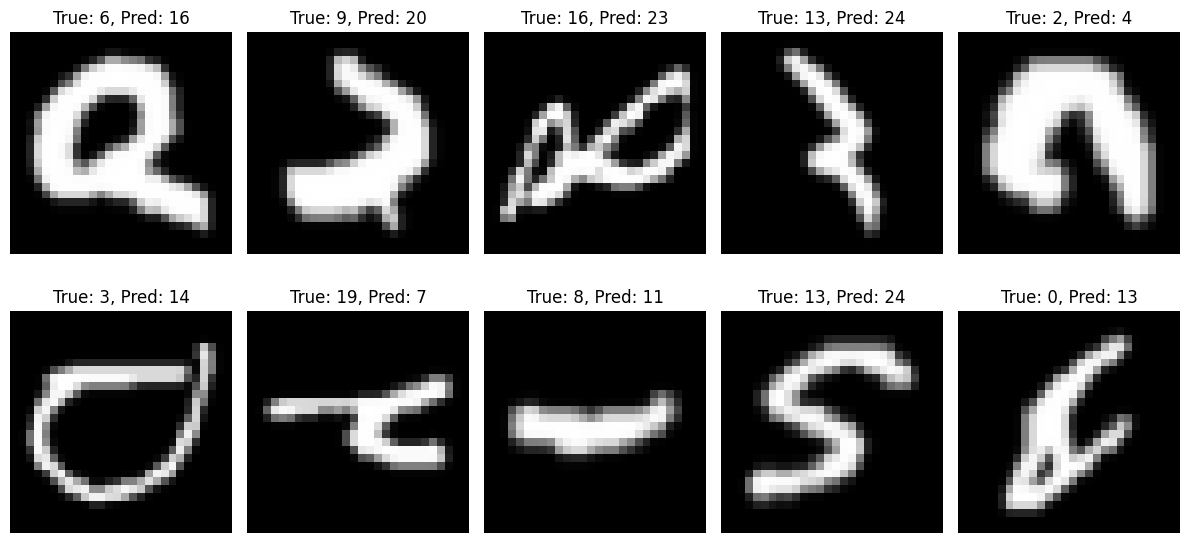

In [30]:
misclassified_indices = np.where(y_pred_labels != y_true_labels)[0]
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true_labels[index]}, Pred: {y_pred_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Most Misclassified Letter

In [31]:
misclassified_counts = np.bincount(y_true_labels[misclassified_indices])
most_misclassified = np.argmax(misclassified_counts)
print(f"Most Misclassified Letter: {chr(most_misclassified + 97)}")  # Convert index to letter


Most Misclassified Letter: l


Hidden layer weight visualization

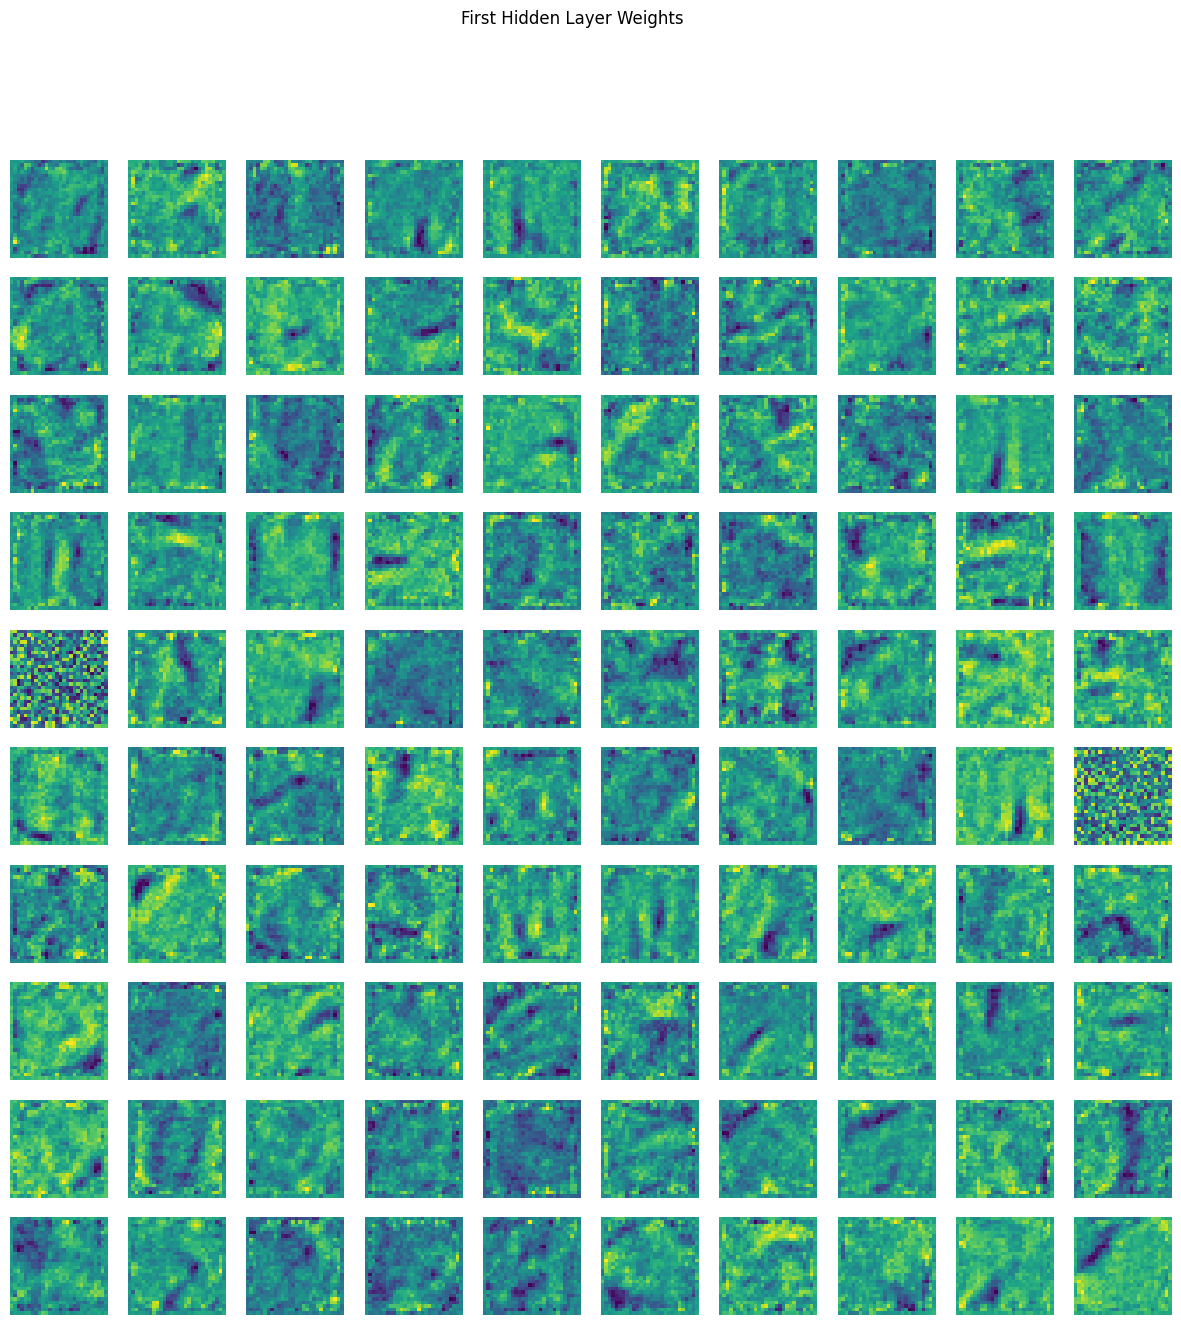

In [32]:
first_layer_weights = model.layers[1].get_weights()[0]
plt.figure(figsize=(15, 15))
for i in range(min(100, first_layer_weights.shape[1])):
    plt.subplot(10, 10, i + 1)
    plt.imshow(first_layer_weights[:, i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('First Hidden Layer Weights')
plt.show()

Uppercase vs lowercase analysis

In [33]:
uppercase_indices = np.where(y_true_labels < 13)[0]
lowercase_indices = np.where(y_true_labels >= 13)[0]

uppercase_acc = np.mean(y_true_labels[uppercase_indices] == y_pred_labels[uppercase_indices])
lowercase_acc = np.mean(y_true_labels[lowercase_indices] == y_pred_labels[lowercase_indices])

print(f"Uppercase Accuracy: {uppercase_acc:.4f}")
print(f"Lowercase Accuracy: {lowercase_acc:.4f}")

if uppercase_acc > lowercase_acc:
    print("Uppercase letters are easier to classify.")
else:
    print("Lowercase letters are easier to classify.")


Uppercase Accuracy: 0.8631
Lowercase Accuracy: 0.9102
Lowercase letters are easier to classify.
